In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

In [56]:
data_path_train = 'Cleaned_Train_Dataset.csv'
data_path_test = 'Cleaned_Test_Dataset.csv'

rs = 42

models = [DecisionTreeClassifier(random_state=rs), 
          KNeighborsClassifier(), 
          GaussianNB(),
          RandomForestClassifier(max_depth=40,n_estimators=1050,random_state=rs),
          SVC(max_iter=10000),
          LinearSVC(max_iter=10000),
          #CatBoostClassifier(),
          XGBClassifier(eval_metric='logloss', use_label_encoder=False),
          LogisticRegression(),
          GradientBoostingClassifier(random_state=rs),
          BaggingClassifier(XGBClassifier(eval_metric='logloss',use_label_encoder=False),random_state=rs),
          BaggingClassifier(GradientBoostingClassifier(random_state=rs),random_state=rs)
         ]

In [57]:
def evaluate_for_models(models, X, y):
    results = pd.DataFrame({'Model': [], 'ScoreMean': [], 'Score Standard Deviation': []})
    for model in models:
        score = cross_val_score(model, X, y, 
                                scoring='f1')
        new_result = {'Model': model.__class__.__name__, 
                      'ScoreMean': score.mean(), 'Score Standard Deviation': score.std()}
        results = results.append(new_result, ignore_index=True)
    return results.sort_values(by=['ScoreMean', 'Score Standard Deviation'])

In [58]:
dataset_train = pd.read_csv(data_path_train,index_col=0)
dataset_train.head()

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
customer_id,,,,,,,,,,,,,,,,,,,
1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No
1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No
1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No
1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No
1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No


In [59]:
dataset_train.describe()

,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000
mean,101.327422,473.525519,7.690311,182.288408,100.779412,30.987353,201.516782,100.237457,17.135108,201.030709,87.604671,9.044818,10.271064,4.441609,2.773702,1.650952
std,39.923689,42.039577,13.595317,57.692419,20.476068,9.770192,50.928849,19.830989,4.323579,50.611310,12.751709,2.279042,2.715125,2.457789,0.732984,1.429327
min,1.000000,445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,445.000000,0.000000,144.175000,87.000000,24.495000,165.975000,87.000000,14.190000,167.275000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000
50%,101.000000,452.000000,0.000000,180.450000,102.000000,30.600000,202.500000,101.000000,17.220000,201.000000,90.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,452.000000,15.000000,221.000000,115.000000,37.605000,236.400000,114.000000,20.090000,234.900000,98.000000,10.580000,12.000000,6.000000,3.240000,2.000000
max,232.000000,547.000000,51.000000,350.800000,165.000000,60.960000,358.500000,170.000000,30.830000,395.000000,105.000000,17.770000,18.300000,20.000000,4.940000,9.000000


In [60]:
dataset_test= pd.read_csv(data_path_test,index_col=0)
dataset_test.head()

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
customer_id,,,,,,,,,,,,,,,,,,
3322,91,445.0,yes,no,0.0,258.4,112.0,42.89,190.0,93,14.47,158.6,105.0,7.09,12.1,3.0,3.27,2.0
3323,113,445.0,no,yes,20.0,155.8,81.0,28.83,168.5,62,13.73,275.5,105.0,12.22,8.7,3.0,2.35,5.0
3324,122,445.0,no,no,0.0,237.2,137.0,40.30,263.8,134,22.76,251.3,105.0,10.81,8.8,4.0,2.38,1.0
3325,103,445.0,no,no,0.0,133.6,117.0,23.60,156.1,130,13.37,207.2,105.0,9.95,10.4,7.0,2.81,8.0
3326,111,452.0,no,no,0.0,115.6,120.0,24.54,211.1,66,18.79,140.9,105.0,5.76,12.7,1.0,3.43,4.0


In [61]:
dataset_train.describe()

,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000
mean,101.327422,473.525519,7.690311,182.288408,100.779412,30.987353,201.516782,100.237457,17.135108,201.030709,87.604671,9.044818,10.271064,4.441609,2.773702,1.650952
std,39.923689,42.039577,13.595317,57.692419,20.476068,9.770192,50.928849,19.830989,4.323579,50.611310,12.751709,2.279042,2.715125,2.457789,0.732984,1.429327
min,1.000000,445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,445.000000,0.000000,144.175000,87.000000,24.495000,165.975000,87.000000,14.190000,167.275000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000
50%,101.000000,452.000000,0.000000,180.450000,102.000000,30.600000,202.500000,101.000000,17.220000,201.000000,90.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,452.000000,15.000000,221.000000,115.000000,37.605000,236.400000,114.000000,20.090000,234.900000,98.000000,10.580000,12.000000,6.000000,3.240000,2.000000
max,232.000000,547.000000,51.000000,350.800000,165.000000,60.960000,358.500000,170.000000,30.830000,395.000000,105.000000,17.770000,18.300000,20.000000,4.940000,9.000000


In [62]:
dataset_train["Churn"].value_counts()

No     1737
Yes     575
Name: Churn, dtype: int64

In [63]:
churn_dataset_train = dataset_train.loc[dataset_train.Churn == "Yes"]
not_churn_dataset_train = dataset_train.loc[dataset_train.Churn == "No"]

In [64]:
churn_dataset_train["Churn"].value_counts()

Yes    575
Name: Churn, dtype: int64

In [65]:
not_churn_dataset_train["Churn"].value_counts()

No    1737
Name: Churn, dtype: int64

In [66]:
new_dataset_train = not_churn_dataset_train.copy(deep=True)
for i in range(3):
    new_dataset_train = new_dataset_train.append(churn_dataset_train)
new_dataset_train

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
customer_id,,,,,,,,,,,,,,,,,,,
1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No
1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No
1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No
1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No
1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,130.0,452,no,no,0.0,212.8,102.0,36.18,189.8,137.0,16.13,170.1,105.0,7.65,10.6,4.0,2.86,0.0,Yes
3312,113.0,452,no,no,0.0,272.1,111.0,46.26,268.5,118.0,22.82,213.8,105.0,9.62,8.5,10.0,2.30,1.0,Yes
3319,55.0,452,yes,no,0.0,188.9,88.0,34.62,270.1,105.0,22.77,209.7,105.0,9.17,14.3,5.0,3.86,1.0,Yes


In [67]:
dataset_train = new_dataset_train.sample(frac = 1 , random_state = 42)
dataset_train["Churn"].value_counts()

No     1737
Yes    1725
Name: Churn, dtype: int64

In [68]:


dataset_train["total_min"] = dataset_train["total_day_min"] + dataset_train["total_eve_min"] + dataset_train["total_night_minutes"] + dataset_train["total_intl_minutes"]
dataset_train["total_calls"] = dataset_train["total_day_calls"] + dataset_train["total_eve_calls"] + dataset_train["total_night_calls"]
dataset_train["day_charge_per_min"] = (dataset_train["total_day_charge"]/ dataset_train["total_day_min"])
dataset_train["eve_charge_per_min"] = (dataset_train["total_eve_charge"]/ dataset_train["total_eve_min"])
dataset_train["night_charge_per_min"] = (dataset_train["total_night_charge"]/ dataset_train["total_night_minutes"])
dataset_train["total_charge"] = (dataset_train["total_day_charge"] + dataset_train["total_eve_charge"] + dataset_train["total_night_charge"] + dataset_train["total_intl_charge"] )

# data["intl_charge_per_min"] = (data["total_intl_charge"]/ data["total_intl_minutes"]).round(decimals = 2)


dataset_test["total_min"] = dataset_test["total_day_min"] + dataset_test["total_eve_min"] + dataset_test["total_night_minutes"]+ dataset_test["total_intl_minutes"]
dataset_test["total_calls"] = dataset_test["total_day_calls"] + dataset_test["total_eve_calls"] + dataset_test["total_night_calls"]
dataset_test["day_charge_per_min"] = (dataset_test["total_day_charge"]/ dataset_test["total_day_min"])
dataset_test["eve_charge_per_min"] = (dataset_test["total_eve_charge"]/ dataset_test["total_eve_min"])
dataset_test["night_charge_per_min"] = (dataset_test["total_night_charge"]/ dataset_test["total_night_minutes"])
dataset_test["total_charge"] = (dataset_test["total_day_charge"] + dataset_test["total_eve_charge"] + dataset_test["total_night_charge"] + dataset_test["total_intl_charge"] )


#dataset_test["intl_charge_per_min"] = (dataset_test["total_intl_charge"]/ dataset_test["total_intl_minutes"]).round(decimals = 2)


for col in ["day_charge_per_min","eve_charge_per_min","night_charge_per_min"]:
    dataset_train[col].fillna(dataset_train[col].mean(),inplace = True)
    dataset_test[col].fillna(dataset_train[col].mean(),inplace = True)


# plt.figure(figsize=(14,10))
# sns.scatterplot(data=data,y="total_min",x="total_night_minutes",hue="Churn")
# plt.show()



In [69]:
#dataset_train["day_vs_eve"] = dataset_train["day_charge_per_min"] / dataset_train["eve_charge_per_min"]
#dataset_train["total_charge"] = (dataset_train["total_day_charge"] + dataset_train["total_eve_charge"] + dataset_train["total_night_charge"])
#dataset_train["total_charge_per_min"] = dataset_train["total_min"] / dataset_train["total_charge"]

#dataset_test["total_charge"] = (dataset_test["total_day_charge"] + dataset_test["total_eve_charge"] + dataset_test["total_night_charge"])
#dataset_train["total_calls"] = dataset_train["total_min"]  + dataset_train["customer_service_calls"]


# def is_highcalls(row):
#     if (row["customer_service_calls"] >3):
#         row["highcalls"] = 1
#     return row

# dataset_train["highcalls"] = 0 
# dataset_train = dataset_train.apply(is_highcalls,axis = 1)

# def is_both_plans(row):
#     if (row["intertiol_plan"] == 'yes') and (row["voice_mail_plan"] == 'yes' ):
#         row["both_plans"] = 1
#     return row

# dataset_train["both_plans"] = 0 
# dataset_train = dataset_train.apply(is_both_plans,axis = 1)

#dataset_train["day_vs_eve"] = dataset_train["day_charge_per_min"] / dataset_train["eve_charge_per_min"]


#dataset_train["day_vs_night"] = dataset_train["day_charge_per_min"] / dataset_train["night_charge_per_min"]
#dataset_train["eve_vs_night"] = dataset_train["eve_charge_per_min"] / dataset_train["night_charge_per_min"]
#dataset_train["total_charge_per_min"] = (dataset_train["day_charge_per_min"] + dataset_train["eve_charge_per_min"] + dataset_train["night_charge_per_min"]) / 3

In [70]:
encoded_train = pd.get_dummies(dataset_train, columns=['location_code'])
encoded_test = pd.get_dummies(dataset_test, columns=['location_code'])
#encoded_train = dataset_train.copy()
encoded_train['Churn'] = encoded_train['Churn'].str.lower()
for col in ['intertiol_plan', 'voice_mail_plan', 'Churn']:
    encoded_train[col] = encoded_train[col].map({'yes': 1, 'no': 0})

for col in ['intertiol_plan', 'voice_mail_plan']:
    encoded_test[col] =  encoded_test[col].map({'yes': 1, 'no': 0})
encoded_train.tail()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,...,Churn,total_min,total_calls,day_charge_per_min,eve_charge_per_min,night_charge_per_min,total_charge,location_code_445,location_code_452,location_code_547
customer_id,,,,,,,,,,,,,,,,,,,,,
2470,95.0,0,0,0.0,174.0,57.0,29.58,281.1,118.0,23.89,...,0,662.0,269.0,0.170000,0.084988,0.044980,64.96,0,0,1
2520,170.0,0,0,0.0,246.4,107.0,41.89,228.1,124.0,19.39,...,0,650.0,326.0,0.170008,0.085007,0.045012,71.23,0,1,0
2740,148.0,0,0,0.0,178.3,98.0,30.31,282.6,110.0,24.02,...,0,653.3,306.0,0.169994,0.084996,0.045028,65.56,0,1,0
2175,38.0,0,0,0.0,194.4,94.0,33.05,186.7,95.0,15.87,...,0,615.2,279.0,0.170010,0.085003,0.045007,61.89,0,1,0
2073,79.0,0,0,0.0,275.3,117.0,45.61,171.5,109.0,16.77,...,1,707.7,314.0,0.165674,0.097784,0.046779,75.99,0,1,0


In [71]:
encoded_test.tail()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,...,customer_service_calls,total_min,total_calls,day_charge_per_min,eve_charge_per_min,night_charge_per_min,total_charge,location_code_445.0,location_code_452.0,location_code_547.0
customer_id,,,,,,,,,,,,,,,,,,,,,
4817,23,0,0,0.0,321.6,107.0,54.67,251.6,115,21.39,...,2.0,725.6,380.0,0.169994,0.085016,0.045004,85.46,0,0,1
4818,23,0,0,0.0,334.6,107.0,52.67,261.6,121,21.39,...,2.0,734.6,386.0,0.157412,0.081766,0.049961,83.46,0,0,1
4819,103,0,0,0.0,70.9,134.0,12.05,134.5,112,11.43,...,2.0,386.2,410.0,0.169958,0.084981,0.045024,34.32,0,1,0
4820,34,0,0,0.0,193.7,74.0,32.93,126.9,84,10.79,...,0.0,550.6,324.0,0.170005,0.085028,0.044982,56.05,0,1,0
4821,129,0,1,33.0,119.6,104.0,20.33,278.7,88,23.69,...,2.0,667.6,367.0,0.169983,0.085002,0.044989,57.46,0,1,0


In [72]:
X = encoded_train.drop(columns=['Churn'])
y = encoded_train.Churn

In [73]:
scaler = StandardScaler()
stdscaled = X.copy(deep=True)
stdscaled[stdscaled.columns] = scaler.fit_transform(stdscaled[stdscaled.columns])
stdscaled.head()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,...,customer_service_calls,total_min,total_calls,day_charge_per_min,eve_charge_per_min,night_charge_per_min,total_charge,location_code_445,location_code_452,location_code_547
customer_id,,,,,,,,,,,,,,,,,,,,,
2132,0.221078,-0.462937,-0.535713,-0.516669,-0.157370,1.139280,-0.299868,-1.910633,-2.144946,-1.765295,...,1.323952,-0.965575,-0.532434,-1.194251,2.066559,0.806086,-0.826769,-0.601152,-0.976024,1.747531
1561,-2.407522,-0.462937,-0.535713,-0.516669,-0.098805,0.759264,-0.099369,1.030698,-1.436758,1.030713,...,-0.519534,0.216478,-0.659336,-0.034482,-0.045704,0.018225,0.183589,-0.601152,-0.976024,1.747531
1607,-2.232282,-0.462937,-0.535713,-0.516669,1.794277,1.519297,1.805366,-0.660714,-0.728571,-0.665871,...,-1.134030,1.026117,0.324156,-0.034800,-0.051366,-0.005261,1.436272,-0.601152,1.024565,-0.572236
1790,-1.055670,2.160121,1.866670,1.704284,1.425475,0.284244,1.023984,0.287026,-0.475646,0.456698,...,-1.134030,0.261942,-0.246904,-2.195174,1.109623,-4.465767,0.776117,1.663472,-0.976024,-0.572236
2462,-0.955533,-0.462937,1.866670,2.546714,0.319066,0.711762,0.321303,0.559771,-0.576816,0.558540,...,3.781933,0.103303,0.324156,-0.032978,-0.045636,0.024559,0.252019,-0.601152,-0.976024,1.747531


In [74]:
scaler = MinMaxScaler()
minscaled = X.copy(deep=True)
minscaled[minscaled.columns] = scaler.fit_transform(minscaled[minscaled.columns])
minscaled.head()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,...,customer_service_calls,total_min,total_calls,day_charge_per_min,eve_charge_per_min,night_charge_per_min,total_charge,location_code_445,location_code_452,location_code_547
customer_id,,,,,,,,,,,,,,,,,,,,,
2132,0.476190,0.0,0.0,0.000000,0.512828,0.757576,0.476870,0.297908,0.341176,0.315926,...,0.444444,0.370568,0.417910,0.490143,0.533785,0.425243,0.384938,0.0,0.0,1.0
1561,0.021645,0.0,0.0,0.000000,0.523375,0.709091,0.511975,0.716039,0.423529,0.707752,...,0.111111,0.573997,0.398010,0.559633,0.386900,0.364981,0.549593,0.0,0.0,1.0
1607,0.051948,0.0,0.0,0.000000,0.864310,0.806061,0.845472,0.475593,0.505882,0.469997,...,0.000000,0.713334,0.552239,0.559614,0.386506,0.363185,0.753739,0.0,1.0,0.0
1790,0.255411,1.0,1.0,0.568627,0.797891,0.648485,0.708661,0.610321,0.535294,0.627311,...,0.000000,0.581821,0.462687,0.430172,0.467240,0.022011,0.646156,1.0,0.0,0.0
2462,0.272727,0.0,1.0,0.784314,0.598632,0.703030,0.585630,0.649093,0.523529,0.641583,...,0.888889,0.554520,0.552239,0.559723,0.386904,0.365466,0.560745,0.0,0.0,1.0


In [75]:
evaluate_for_models(models, X, y)

/Users/laksika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/laksika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/laksika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/laksika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/laksika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWa

,Model,ScoreMean,Score Standard Deviation
5,LinearSVC,0.484271,0.235244
4,SVC,0.591165,0.015126
7,LogisticRegression,0.702805,0.019579
1,KNeighborsClassifier,0.829307,0.002169
2,GaussianNB,0.836329,0.009529
10,BaggingClassifier,0.972625,0.005317
8,GradientBoostingClassifier,0.973242,0.004789
0,DecisionTreeClassifier,0.983105,0.006609
9,BaggingClassifier,0.994463,0.002838
3,RandomForestClassifier,0.995639,0.004871


In [76]:
evaluate_for_models(models, stdscaled, y)

,Model,ScoreMean,Score Standard Deviation
2,GaussianNB,0.676026,0.021413
7,LogisticRegression,0.762852,0.009437
5,LinearSVC,0.767418,0.011567
1,KNeighborsClassifier,0.874227,0.015443
4,SVC,0.931977,0.003205
10,BaggingClassifier,0.971706,0.005521
8,GradientBoostingClassifier,0.973544,0.004842
0,DecisionTreeClassifier,0.981978,0.005170
9,BaggingClassifier,0.994463,0.002838
3,RandomForestClassifier,0.995639,0.004871


In [77]:
evaluate_for_models(models, minscaled, y)

/Users/laksika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/laksika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

,Model,ScoreMean,Score Standard Deviation
2,GaussianNB,0.676026,0.021413
5,LinearSVC,0.760903,0.010016
7,LogisticRegression,0.761904,0.013274
4,SVC,0.868621,0.011444
1,KNeighborsClassifier,0.906090,0.008869
10,BaggingClassifier,0.971706,0.005521
8,GradientBoostingClassifier,0.973544,0.004842
0,DecisionTreeClassifier,0.981978,0.005170
9,BaggingClassifier,0.994463,0.002838
3,RandomForestClassifier,0.995639,0.004871


<AxesSubplot:>

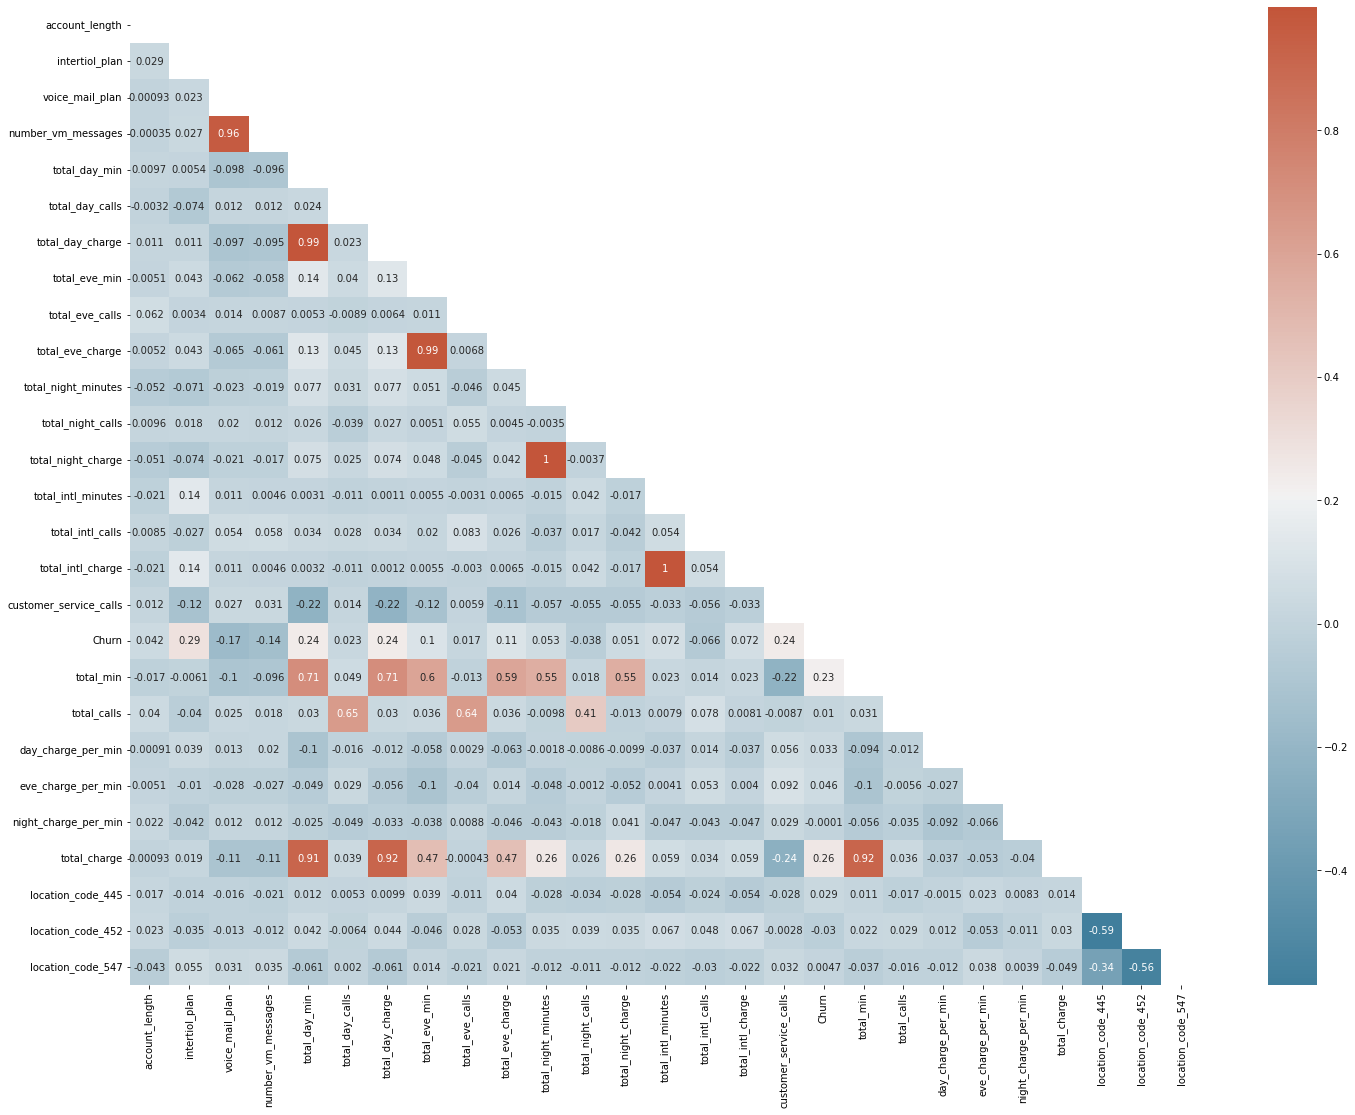

In [78]:
corr = encoded_train.corr()
f, ax = plt.subplots(figsize=(24, 18))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [79]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X, y)
Xnew = encoded_test
ynew = model.predict(Xnew)
y_pre = model.predict(X)

In [80]:
accuracy_score(y, y_pre)

0.9774696707105719

In [81]:
dataset_test_index = pd.read_csv(data_path_test)
dataset_test_index.head()
submission_df = pd.DataFrame({'customer_id':dataset_test_index.customer_id,'Churn':ynew})
submission_df.Churn =submission_df.Churn.map({1: "Yes", 0: "No"})
submission_df

,customer_id,Churn
0,3322,Yes
1,3323,Yes
2,3324,Yes
3,3325,Yes
4,3326,Yes
...,...,...
1495,4817,Yes
1496,4818,Yes
1497,4819,No
1498,4820,No


In [82]:
#submission_df.to_csv("190346A_Gradient_16_mini.csv",index=False)

In [83]:
# booster=['gbtree','gblinear']
# base_score=[0.25,0.5,0.75,1]

# ## Hyper Parameter Optimization
# n_estimators = [100, 500, 900, 1100, 1500]
# max_depth = [2, 3, 5, 10, 15]
# booster=['gbtree','gblinear']
# learning_rate=[0.05,0.1,0.15,0.20]
# min_child_weight=[1,2,3,4]

# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'min_child_weight':min_child_weight,
#     'booster':booster,
#     'base_score':base_score
#     }

# # Set up the random search with 4-fold cross validation
# random_cv = RandomizedSearchCV(estimator=XGBClassifier(eval_metric='logloss', use_label_encoder=False),
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)

# random_cv.fit(X,y)

# random_cv.best_estimator_
